In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=10000, random_state=1)
x_train, x_val, y_train, y_val= train_test_split(x_train, y_train, test_size=10000, random_state=1)


In [ ]:
len(y_val)

10000

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(x_train)
x_scaled = scaler.transform(x_train)
x_val_scaled=scaler.transform(x_val)
x_test_scaled= scaler.transform(x_test)


In [ ]:
#creating confusion matrix

In [ ]:
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K
from keras.utils import to_categorical, plot_model

In [ ]:
?Dropout

In [ ]:
#commputing the number of layers
num_labels = len(np.unique(y_train))
num_labels

10

In [ ]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_val=to_categorical(y_val)
y_test = to_categorical(y_test)

In [ ]:
# resize and normalize
input_size= x_train.shape[1]

x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255

x_val = np.reshape(x_val, [-1, input_size])
x_val = x_val.astype('float32') / 255

x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255



In [ ]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.2

In [ ]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential([
    Dense(hidden_units, input_dim=input_size,activation="relu",kernel_regularizer="l2"),
    Dropout(dropout),
    Dense(hidden_units,activation="relu",kernel_regularizer="l2"),
    Dropout(dropout),
    Dense(num_labels,activation="softmax")
    
])

# model.add(Dense(hidden_units, input_shape=input_size,activation="relu"))
# model.add(Activation('relu'))
# model.add(Dropout(dropout))
# model.add(Dense(hidden_units))
# model.add(Activation('relu'))
# model.add(Dropout(dropout))
# model.add(Dense(num_labels))
# model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 256)               200960    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               65792     
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


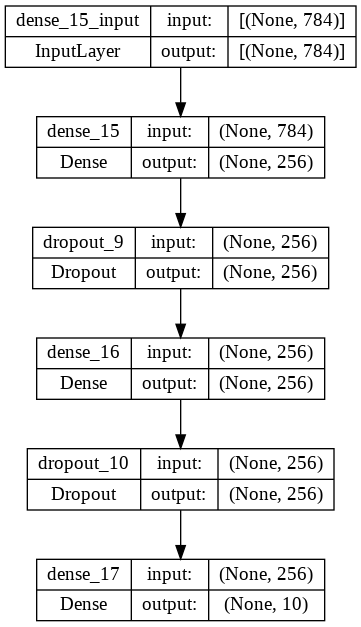

In [ ]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train,
                    validation_data=(x_val,y_val),
                  epochs=30, batch_size=batch_size)

Epoch 1/30
391/391 [==============================] - 2s 5ms/step - loss: 1.4819 - accuracy: 0.8684 - val_loss: 0.5809 - val_accuracy: 0.9173
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.5620 - accuracy: 0.9145 - val_loss: 0.4951 - val_accuracy: 0.9318
Epoch 3/30
391/391 [==============================] - 1s 4ms/step - loss: 0.5083 - accuracy: 0.9247 - val_loss: 0.4634 - val_accuracy: 0.9342
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.4767 - accuracy: 0.9294 - val_loss: 0.4526 - val_accuracy: 0.9340
Epoch 5/30
391/391 [==============================] - 2s 4ms/step - loss: 0.4516 - accuracy: 0.9343 - val_loss: 0.4206 - val_accuracy: 0.9416
Epoch 6/30
391/391 [==============================] - 2s 4ms/step - loss: 0.4347 - accuracy: 0.9355 - val_loss: 0.4297 - val_accuracy: 0.9378
Epoch 7/30
391/391 [==============================] - 1s 4ms/step - loss: 0.4243 - accuracy: 0.9374 - val_loss: 0.4157 - val_accuracy: 0.9399
Epoch 

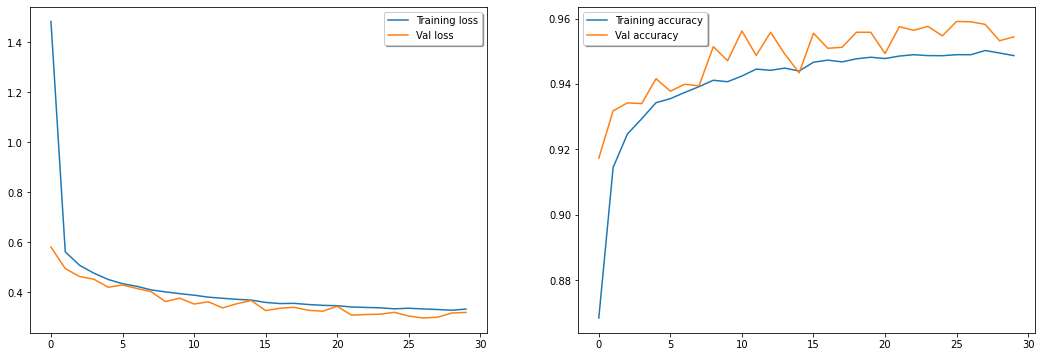

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(1,2, figsize=(18, 6))
ax[0].plot(history.history['loss'], label="Training loss")
ax[0].plot(history.history['val_loss'],  label="Val loss")

#ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], label="Val accuracy")

#ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print(acc)

79/79 [==============================] - 0s 3ms/step - loss: 0.3144 - accuracy: 0.9543
0.9542999863624573


In [ ]:
# resize and normalize
input_size= y_train.shape[1]
y_train = np.reshape(y_train, [-1, input_size])
y_train = y_train.astype('float32') / 255
y_test = np.reshape(y_test, [-1, input_size])
y_test = y_test.astype('float32') / 255



In [ ]:
actual = y_test
predicted = model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


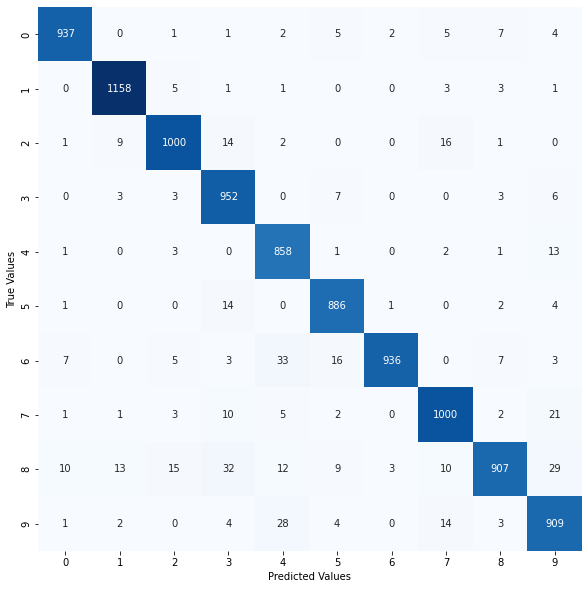

In [ ]:
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(x_test) # Predict class probabilities as 2 => [0.1, 0, 0.9, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

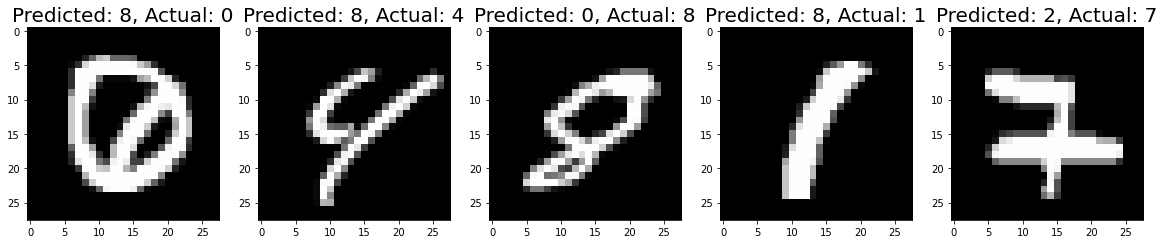

In [ ]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, y_pred):
    if label.argmax() != predict.argmax(): 
        misclassifiedIndexes.append(index)
    index +=1


plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(pd.Series(misclassifiedIndexes).sample(5)):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test.values[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(y_pred[badIndex].argmax(), y_test[badIndex].argmax()), fontsize = 20)
